# Solution - Problem Set 3

## Preparation

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

###Import data

In [57]:
from google.colab import drive
drive.mount("/content/drive")
!mkdir -p datashim
!cp /content/drive/Shareddrives/DS602-S22/Data/data602.py ./datashim
from datashim import data602

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
# CDF only needed if used for #1
#cdf = data602.read_citations('/content/drive/Shareddrives/DS602-S22/Data/Parking_and_Moving_Citations.csv')
wdf = data602.read_weather('/content/drive/Shareddrives/DS602-S22/Data/weather_clean.csv')

# Question 1 -- Statistical data visualization 
In the first assignment, problem 3, you identified an ``interesting'' pattern in the weather or citations dataset.  Recall that discovered knowledge should be novel, useful, and non-trivial.  Develop a explanatory visualization to present the knowledge you discovered.  (You may choose a different pattern from the one you used in the first homework assignment if you wish.) 

In [59]:
wdf.head()

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0
1,2015-12-31 20:54:00-05:00,3.1,6.1,0.0,0,4.0,0,0,0,0
2,2015-12-31 21:54:00-05:00,2.1,6.7,0.0,0,4.0,0,0,0,0
3,2015-12-31 22:54:00-05:00,2.6,6.1,0.0,0,4.0,0,0,0,0
4,2015-12-31 23:54:00-05:00,2.1,5.6,0.0,0,4.0,0,0,0,0


In [60]:
wdf['day'] = wdf['date'].dt.day
wdf['month'] = wdf['date'].dt.month
wdf['year'] = wdf['date'].dt.year
wdf['time'] = wdf['date'].dt.hour
wdf.head()

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,day,month,year,time
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0,31,12,2015,19
1,2015-12-31 20:54:00-05:00,3.1,6.1,0.0,0,4.0,0,0,0,0,31,12,2015,20
2,2015-12-31 21:54:00-05:00,2.1,6.7,0.0,0,4.0,0,0,0,0,31,12,2015,21
3,2015-12-31 22:54:00-05:00,2.6,6.1,0.0,0,4.0,0,0,0,0,31,12,2015,22
4,2015-12-31 23:54:00-05:00,2.1,5.6,0.0,0,4.0,0,0,0,0,31,12,2015,23


In [61]:
wdf_2020 = wdf[wdf["year"]==2020]
wdf_2020.head()

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,day,month,year,time
35055,2020-01-01 00:54:00-05:00,6.2,6.1,0.0,0,4.0,0,0,0,0,1,1,2020,0
35056,2020-01-01 01:54:00-05:00,6.7,6.1,0.0,0,4.0,0,0,0,0,1,1,2020,1
35057,2020-01-01 02:54:00-05:00,3.1,5.6,0.0,0,4.0,0,0,0,0,1,1,2020,2
35058,2020-01-01 03:54:00-05:00,3.1,5.6,0.0,0,4.0,0,0,0,0,1,1,2020,3
35059,2020-01-01 04:54:00-05:00,3.1,5.6,0.0,0,4.0,0,0,0,0,1,1,2020,4


[Text(0.5, 1.0, 'Month Vs Temperature Means in 2020')]

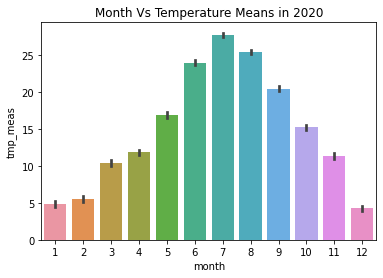

In [62]:
sns.barplot(x="month", y="tmp_meas", data=wdf_2020).set(title='Month Vs Temperature Means in 2020')

### We can observe clearly from the above plot that the highest temperature is recorded in the month of July and the coldest was in the month of december.

[Text(0.5, 1.0, 'Year Vs Temperature Means')]

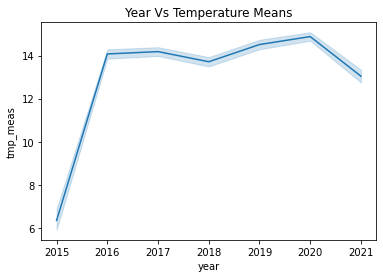

In [63]:
sns.lineplot(x="year", y="tmp_meas", data=wdf).set(title='Year Vs Temperature Means')

### From the above line plot we can observe that there is a sudden increase in temperature from the year 2015 to 2016 and then there is a slight decrease till the year 2018 and then the temperature rises.By this we can assume that the temperature is changing constantly for evry two years.

In [64]:
wdf_prep= wdf[wdf["precip"]>0.0]
wdf_prep

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,day,month,year,time
176,2016-01-08 03:54:00-05:00,0.0,3.3,0.3,1,4.0,0,0,1,0,8,1,2016,3
203,2016-01-09 06:54:00-05:00,2.1,5.0,0.3,1,4.0,0,0,1,0,9,1,2016,6
204,2016-01-09 07:54:00-05:00,1.5,5.0,0.3,1,4.0,0,0,1,0,9,1,2016,7
219,2016-01-09 22:54:00-05:00,3.6,9.4,1.8,2,4.0,0,0,1,0,9,1,2016,22
220,2016-01-09 23:54:00-05:00,6.7,10.0,5.1,1,4.0,0,0,1,0,9,1,2016,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48362,2021-07-08 15:54:00-04:00,2.1,25.6,1.5,0,3.0,0,0,0,0,8,7,2021,15
48363,2021-07-08 16:54:00-04:00,2.1,26.7,1.0,0,3.0,0,0,0,0,8,7,2021,16
48366,2021-07-08 19:54:00-04:00,0.0,24.4,0.3,1,4.0,0,0,0,0,8,7,2021,19
48367,2021-07-08 20:54:00-04:00,2.6,22.8,1.0,0,4.0,0,0,0,0,8,7,2021,20


[Text(0.5, 1.0, 'Rainfall in different months')]

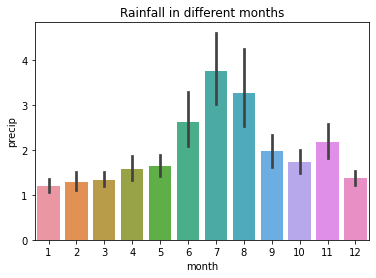

In [65]:
sns.barplot(x="month", y="precip", data=wdf_prep).set(title='Rainfall in different months')

### On an average we can observe that the highest rainfall occurs in the month of July when overall weather data is considered.

In [66]:
wdf_prep_2020 = wdf_2020[wdf_2020["precip"]>0.0]
wdf_prep_2020.head()

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,day,month,year,time
35106,2020-01-03 03:54:00-05:00,3.6,8.9,1.0,1,4.0,0,0,0,0,3,1,2020,3
35107,2020-01-03 04:54:00-05:00,3.1,8.3,1.5,1,4.0,0,0,1,0,3,1,2020,4
35108,2020-01-03 05:54:00-05:00,0.0,8.3,1.3,1,4.0,0,0,0,0,3,1,2020,5
35109,2020-01-03 06:54:00-05:00,0.0,8.3,0.5,0,4.0,0,0,0,0,3,1,2020,6
35121,2020-01-03 18:54:00-05:00,2.1,11.1,0.3,1,4.0,0,0,1,0,3,1,2020,18


[Text(0.5, 1.0, 'Rainfall in different months in the year 2020')]

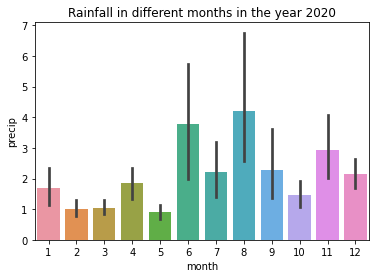

In [67]:
sns.barplot(x="month", y="precip", data=wdf_prep_2020).set(title='Rainfall in different months in the year 2020')

### We can observe that the highest rainfall in 2020 was in the month of August.

#Question 2 -- Data preparation

This problem uses the weather dataset from previous problem sets.  Prepare a dataset to predict the observed temperature from the following predictors:

* The non-temperature fields from the observation
* The temperature recorded in the prior observation

Beginning with the weather dataset:

a. Add the temperature from the prior reading as a new feature.  That is, for each observation at time $t_k$, $k>0$, the new feature should have the value of the temperature reading at time $t_{k-1}$.  For the first observation ($k=0$), the value should be missing because the prior temperature is unknown.


In [68]:
wdf.head()

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,day,month,year,time
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0,31,12,2015,19
1,2015-12-31 20:54:00-05:00,3.1,6.1,0.0,0,4.0,0,0,0,0,31,12,2015,20
2,2015-12-31 21:54:00-05:00,2.1,6.7,0.0,0,4.0,0,0,0,0,31,12,2015,21
3,2015-12-31 22:54:00-05:00,2.6,6.1,0.0,0,4.0,0,0,0,0,31,12,2015,22
4,2015-12-31 23:54:00-05:00,2.1,5.6,0.0,0,4.0,0,0,0,0,31,12,2015,23


In [69]:
new_df=wdf.assign(new_tmp_meas = wdf.tmp_meas)
new_df.head()

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,day,month,year,time,new_tmp_meas
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0,31,12,2015,19,7.2
1,2015-12-31 20:54:00-05:00,3.1,6.1,0.0,0,4.0,0,0,0,0,31,12,2015,20,6.1
2,2015-12-31 21:54:00-05:00,2.1,6.7,0.0,0,4.0,0,0,0,0,31,12,2015,21,6.7
3,2015-12-31 22:54:00-05:00,2.6,6.1,0.0,0,4.0,0,0,0,0,31,12,2015,22,6.1
4,2015-12-31 23:54:00-05:00,2.1,5.6,0.0,0,4.0,0,0,0,0,31,12,2015,23,5.6


b. Because the observed temperature is the target variable, remove the current temperature from the data frame, and save the values into a matrix $\mathbf{y}$

In [70]:
new_df['new_tmp_meas'] = new_df['new_tmp_meas'].shift(1)
new_df.head()

,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,day,month,year,time,new_tmp_meas
0,2015-12-31 19:54:00-05:00,1.5,7.2,0.0,0,4.0,0,0,0,0,31,12,2015,19,NaN
1,2015-12-31 20:54:00-05:00,3.1,6.1,0.0,0,4.0,0,0,0,0,31,12,2015,20,7.2
2,2015-12-31 21:54:00-05:00,2.1,6.7,0.0,0,4.0,0,0,0,0,31,12,2015,21,6.1
3,2015-12-31 22:54:00-05:00,2.6,6.1,0.0,0,4.0,0,0,0,0,31,12,2015,22,6.7
4,2015-12-31 23:54:00-05:00,2.1,5.6,0.0,0,4.0,0,0,0,0,31,12,2015,23,6.1


In [71]:
df1=new_df.pop('tmp_meas')
df1

0         7.2
1         6.1
2         6.7
3         6.1
4         5.6
         ... 
48554    36.7
48555    35.6
48556    33.3
48557    32.8
48558    31.7
Name: tmp_meas, Length: 48559, dtype: float64

In [72]:
Y=df1.to_numpy(dtype=None, copy=False) # Converting the original Tmp_meas series to Numpy Matrix
Y

array([ 7.2,  6.1,  6.7, ..., 33.3, 32.8, 31.7])

c. Treat missing values in the dataframe so that the output dataset contains no missing values.  In the notebook, explain your approach to treat missing values.

In [73]:
new_df.isnull().sum()

date                 0
wnd_speed           10
precip              75
precip_intensity     0
cloudcover          17
tstorm               0
winter               0
mist                 0
fog                  0
day                  0
month                0
year                 0
time                 0
new_tmp_meas         3
dtype: int64

In [74]:
print("The total number of null values or missing values are:",new_df.isnull().sum().sum())

The total number of null values or missing values are: 105


## The Null values can be replaced in many methods. Few of them are:
-  Replacing the null values with 0 or 1 or any other value
- Replacing the null values with a previous value or a next value in the column
- Replacing the null values with a previous value or a next value in the row
- Replacing with the mean value of the column.

### Here I am replacing the Null Value with the mean value of the column "wnd_speed" as all the Null values are present in the columns which is of the datatype "int".

In [75]:
clean_df=new_df.fillna(value=new_df['wnd_speed'].mean())
clean_df.head()

,date,wnd_speed,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,day,month,year,time,new_tmp_meas
0,2015-12-31 19:54:00-05:00,1.5,0.0,0,4.0,0,0,0,0,31,12,2015,19,3.017236
1,2015-12-31 20:54:00-05:00,3.1,0.0,0,4.0,0,0,0,0,31,12,2015,20,7.200000
2,2015-12-31 21:54:00-05:00,2.1,0.0,0,4.0,0,0,0,0,31,12,2015,21,6.100000
3,2015-12-31 22:54:00-05:00,2.6,0.0,0,4.0,0,0,0,0,31,12,2015,22,6.700000
4,2015-12-31 23:54:00-05:00,2.1,0.0,0,4.0,0,0,0,0,31,12,2015,23,6.100000


d. Remove the observation timestamp, and convert the dataframe to a numpy matrix, $\mathbf{X}$

In [76]:
df2=clean_df.drop(columns=['date','day','month','year','time'])
df2

,wnd_speed,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog,new_tmp_meas
0,1.5,0.0,0,4.0,0,0,0,0,3.017236
1,3.1,0.0,0,4.0,0,0,0,0,7.200000
2,2.1,0.0,0,4.0,0,0,0,0,6.100000
3,2.6,0.0,0,4.0,0,0,0,0,6.700000
4,2.1,0.0,0,4.0,0,0,0,0,6.100000
...,...,...,...,...,...,...,...,...,...
48554,4.6,0.0,0,2.0,0,0,0,0,35.000000
48555,4.1,0.0,0,2.0,0,0,0,0,36.700000
48556,4.1,0.0,0,3.0,0,0,0,0,35.600000
48557,3.6,0.0,0,2.0,0,0,0,0,33.300000


In [77]:
X=df2.to_numpy(dtype=None, copy=False) 
X

array([[ 1.5       ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  3.01723619],
       [ 3.1       ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  7.2       ],
       [ 2.1       ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  6.1       ],
       ...,
       [ 4.1       ,  0.        ,  0.        , ...,  0.        ,
         0.        , 35.6       ],
       [ 3.6       ,  0.        ,  0.        , ...,  0.        ,
         0.        , 33.3       ],
       [ 2.6       ,  0.        ,  0.        , ...,  0.        ,
         0.        , 32.8       ]])

e. Scale the numpy array $\mathbf{X}$ using a [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [84]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
operation = StandardScaler()
data = operation.fit_transform(X)
df3 = pd.DataFrame(data)
print(df3.describe())

                  0             1  ...             7             8
count  4.855900e+04  4.855900e+04  ...  4.855900e+04  4.855900e+04
mean  -2.628885e-15  2.373147e-15  ... -4.361519e-15 -1.026685e-15
std    1.000010e+00  1.000010e+00  ...  1.000010e+00  1.000010e+00
min   -1.296960e+00 -1.394183e-01  ... -8.421956e-02 -2.980658e+00
25%   -6.521846e-01 -1.394183e-01  ... -8.421956e-02 -7.934158e-01
50%   -1.793492e-01 -1.394183e-01  ... -8.421956e-02  2.433669e-02
75%    4.654265e-01 -1.394183e-01  ... -8.421956e-02  8.519417e-01
max    6.440347e+00  7.573433e+01  ...  1.187373e+01  2.329808e+00

[8 rows x 9 columns]


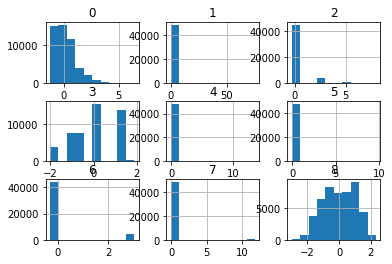

In [85]:
df3.hist()
pyplot.show()

Show the first few rows of the resulting matrices $\mathbf{X}$ and $\mathbf{y}$.

In [79]:
print(np.matrix(X))

[[ 1.5         0.          0.         ...  0.          0.
   3.01723619]
 [ 3.1         0.          0.         ...  0.          0.
   7.2       ]
 [ 2.1         0.          0.         ...  0.          0.
   6.1       ]
 ...
 [ 4.1         0.          0.         ...  0.          0.
  35.6       ]
 [ 3.6         0.          0.         ...  0.          0.
  33.3       ]
 [ 2.6         0.          0.         ...  0.          0.
  32.8       ]]


In [80]:
for i in range(5): #Print 5 rows of matrix X
    print (X[i])

[1.5        0.         0.         4.         0.         0.
 0.         0.         3.01723619]
[3.1 0.  0.  4.  0.  0.  0.  0.  7.2]
[2.1 0.  0.  4.  0.  0.  0.  0.  6.1]
[2.6 0.  0.  4.  0.  0.  0.  0.  6.7]
[2.1 0.  0.  4.  0.  0.  0.  0.  6.1]


In [81]:
print(np.matrix(Y))

[[ 7.2  6.1  6.7 ... 33.3 32.8 31.7]]


In [82]:
Y.shape

(48559,)

In [83]:
for i in range(5): #to print 5 rows of matrix Y
    print (Y[i])

7.2
6.1
6.7
6.1
5.6
